In [2]:
# jupiter-server-codespace

In [3]:
# !pip install tensorflow
# !pip install matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

2025-12-26 13:01:45.833325: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-26 13:02:00.618205: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [5]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# tri = train_images
# trl = train_labels
# tei = test_images
# tel = test_labels

### Load the dataset


In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [7]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
print(y_train.shape,"\n")
print(y_train[:5],"\n")

y_train = y_train.reshape(-1,)
print(y_train[:5],"\n")

(50000, 1) 

[[6]
 [9]
 [9]
 [4]
 [1]] 

[6 9 9 4 1] 



In [10]:
print(y_test.shape,"\n")
print(y_test[:5],"\n")

y_test = y_test.reshape(-1,)
print(y_test[:5],"\n")

(10000, 1) 

[[3]
 [8]
 [8]
 [0]
 [6]] 

[3 8 8 0 6] 



In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

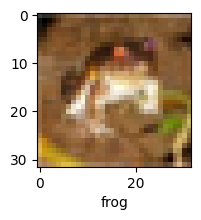

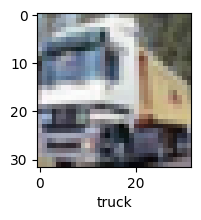

In [13]:
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

### Normalizing the training data

1. Normalize the images to a number from 0 to 1.

2. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 

3. Hence to normalize in 0-->1 range, we need to divide it by 255

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
print(X_train[1])
print(X_test[1])

[[[0.60392157 0.69411765 0.73333333]
  [0.49411765 0.5372549  0.53333333]
  [0.41176471 0.40784314 0.37254902]
  ...
  [0.35686275 0.37254902 0.27843137]
  [0.34117647 0.35294118 0.27843137]
  [0.30980392 0.31764706 0.2745098 ]]

 [[0.54901961 0.62745098 0.6627451 ]
  [0.56862745 0.6        0.60392157]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.37647059 0.38823529 0.30588235]
  [0.30196078 0.31372549 0.24313725]
  [0.27843137 0.28627451 0.23921569]]

 [[0.54901961 0.60784314 0.64313725]
  [0.54509804 0.57254902 0.58431373]
  [0.45098039 0.45098039 0.43921569]
  ...
  [0.30980392 0.32156863 0.25098039]
  [0.26666667 0.2745098  0.21568627]
  [0.2627451  0.27058824 0.21568627]]

 ...

 [[0.68627451 0.65490196 0.65098039]
  [0.61176471 0.60392157 0.62745098]
  [0.60392157 0.62745098 0.66666667]
  ...
  [0.16470588 0.13333333 0.14117647]
  [0.23921569 0.20784314 0.22352941]
  [0.36470588 0.3254902  0.35686275]]

 [[0.64705882 0.60392157 0.50196078]
  [0.61176471 0.59607843 0.50980392]


## Build simple artificial neural network for image classification

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(3000, activation='relu')
])

ann.compile(optimizer='SGD', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2025-12-26 13:23:26.284844: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 36000000 exceeds 10% of free system memory.
2025-12-26 13:23:26.305913: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 36000000 exceeds 10% of free system memory.
2025-12-26 13:23:26.311485: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 36000000 exceeds 10% of free system memory.
2025-12-26 13:23:26.325755: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 36000000 exceeds 10% of free system memory.
2025-12-26 13:23:26.349056: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 36000000 exceeds 10% of free system memory.


Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 with name 'None' of layer 'dense_1' is incompatible with the layer: expected axis -1 of input shape to have value 2048, but received input with shape (None, 3072)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>